
---
# ANALISIS KENAIKAN JABATAN DENGAN FUZZY LOGIC
---

In [ ]:
pip install -U scikit-fuzzy

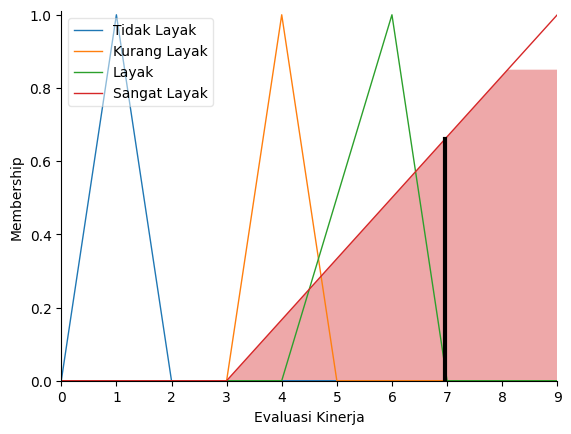

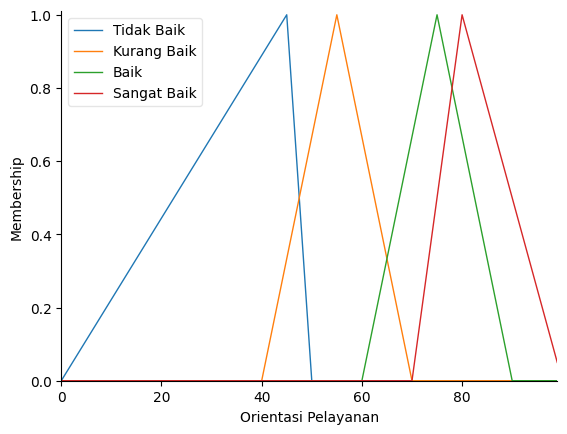

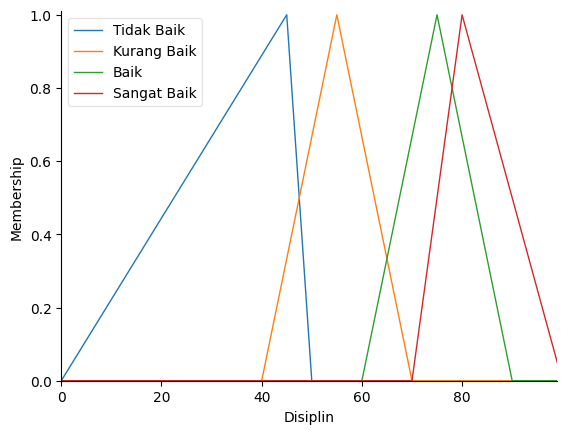

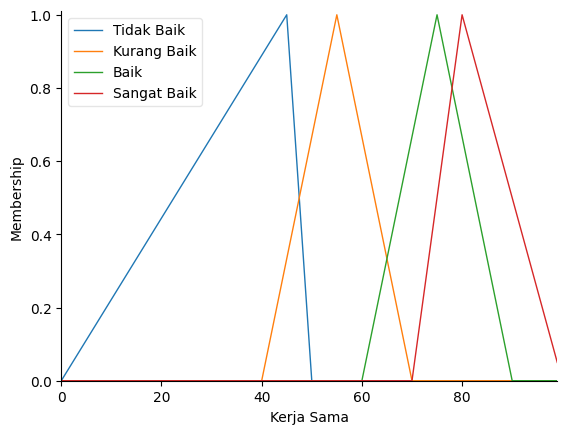

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Membuat variabel input
Orientasi_Pelayanan = ctrl.Antecedent(np.arange(0, 100, 1), 'Orientasi Pelayanan')
Disiplin = ctrl.Antecedent(np.arange(0, 100, 1), 'Disiplin')
KerjaSama = ctrl.Antecedent(np.arange(0, 100, 1), 'Kerja Sama')

# Membuat variabel output
EvaluasiKinerja = ctrl.Consequent(np.arange(0, 10, 1), 'Evaluasi Kinerja')

# Membuat himpunan fuzzy untuk Orientasi Pelayanan
Orientasi_Pelayanan['Tidak Baik'] = fuzz.trimf(Orientasi_Pelayanan.universe, [0, 45, 50])
Orientasi_Pelayanan['Kurang Baik'] = fuzz.trimf(Orientasi_Pelayanan.universe, [40, 55, 70])
Orientasi_Pelayanan['Baik'] = fuzz.trimf(Orientasi_Pelayanan.universe, [60, 75, 90])
Orientasi_Pelayanan['Sangat Baik'] = fuzz.trimf(Orientasi_Pelayanan.universe, [70, 80, 100])

# Membuat himpunan fuzzy untuk Disiplin
Disiplin['Tidak Baik'] = fuzz.trimf(Disiplin.universe, [0, 45, 50])
Disiplin['Kurang Baik'] = fuzz.trimf(Disiplin.universe, [40, 55, 70])
Disiplin['Baik'] = fuzz.trimf(Disiplin.universe, [60, 75, 90])
Disiplin['Sangat Baik'] = fuzz.trimf(Disiplin.universe, [70, 80, 100])

# Membuat himpunan fuzzy untuk Kerja Sama
KerjaSama['Tidak Baik'] = fuzz.trimf(KerjaSama.universe, [0, 45, 50])
KerjaSama['Kurang Baik'] = fuzz.trimf(KerjaSama.universe, [40, 55, 70])
KerjaSama['Baik'] = fuzz.trimf(KerjaSama.universe, [60, 75, 90])
KerjaSama['Sangat Baik'] = fuzz.trimf(KerjaSama.universe, [70, 80, 100])


# Membuat himpunan fuzzy untuk Evaluasi Kinerja
EvaluasiKinerja['Tidak Layak'] = fuzz.trimf(EvaluasiKinerja.universe, [0, 1, 2])
EvaluasiKinerja['Kurang Layak'] = fuzz.trimf(EvaluasiKinerja.universe, [3, 4, 5])
EvaluasiKinerja['Layak'] = fuzz.trimf(EvaluasiKinerja.universe, [4, 6, 7])
EvaluasiKinerja['Sangat Layak'] = fuzz.trimf(EvaluasiKinerja.universe, [3, 9, 10])

# Membuat aturan-aturan fuzzy
aturan1 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Sangat Baik'] & KerjaSama['Sangat Baik'], EvaluasiKinerja['Sangat Layak'])
aturan2 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Sangat Baik'] & KerjaSama['Baik'], EvaluasiKinerja['Sangat Layak'])
aturan3 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Baik'] & KerjaSama['Sangat Baik'], EvaluasiKinerja['Sangat Layak'])
aturan4 = ctrl.Rule(Orientasi_Pelayanan['Baik']  & Disiplin['Sangat Baik'] & KerjaSama['Sangat Baik'], EvaluasiKinerja['Sangat Layak'])
aturan5 = ctrl.Rule(Orientasi_Pelayanan['Kurang Baik'] & Disiplin['Tidak Baik'] & KerjaSama['Tidak Baik'], EvaluasiKinerja['Tidak Layak'])
aturan6 = ctrl.Rule(Orientasi_Pelayanan['Kurang Baik'] & Disiplin['Tidak Baik'] & KerjaSama['Kurang Baik'], EvaluasiKinerja['Tidak Layak'])
aturan7 = ctrl.Rule(Orientasi_Pelayanan['Tidak Baik'] & Disiplin['Kurang Baik'] & KerjaSama['Kurang Baik'], EvaluasiKinerja['Tidak Layak'])
aturan8 = ctrl.Rule(Orientasi_Pelayanan['Tidak Baik'] & Disiplin['Tidak Baik'] & KerjaSama['Tidak Baik'], EvaluasiKinerja['Tidak Layak'])
aturan9 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Sangat Baik'] & KerjaSama['Tidak Baik'], EvaluasiKinerja['Kurang Layak'])
aturan10 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Tidak Baik'] & KerjaSama['Sangat Baik'], EvaluasiKinerja['Kurang Layak'])
aturan11 = ctrl.Rule(Orientasi_Pelayanan['Tidak Baik'] & Disiplin['Sangat Baik'] & KerjaSama['Sangat Baik'], EvaluasiKinerja['Kurang Layak'])
aturan12 = ctrl.Rule(Orientasi_Pelayanan['Sangat Baik'] & Disiplin['Kurang Baik'] & KerjaSama['Tidak Baik'], EvaluasiKinerja['Kurang Layak'])

# Membuat sistem kontrol fuzzy
sistem_kontrol = ctrl.ControlSystem([aturan1, aturan2, aturan3,aturan4, aturan5, aturan6,aturan7, aturan8, aturan9,aturan10, aturan11, aturan12])

# Membuat simulasi sistem kontrol
pengontrol = ctrl.ControlSystemSimulation(sistem_kontrol)

# Memasukkan input Orientasi Pelayanan
pengontrol.input['Orientasi Pelayanan'] = 83
pengontrol.input['Disiplin'] = 83
pengontrol.input['Kerja Sama'] = 82

# Menghitung output evaluasi kinerja
pengontrol.compute()

# Menampilkan grafik output
EvaluasiKinerja.view(sim=pengontrol)

# Menampilkan grafik input Orientasi Pelayanan, Disiplin , kerja sama
Orientasi_Pelayanan.view()
Disiplin.view()
KerjaSama.view()

In [ ]:
HasilEvaluasiKinerja= pengontrol.output["Evaluasi Kinerja"]

print(f'Evaluasi Kinerja: {HasilEvaluasiKinerja: .2f}')

Evaluasi Kinerja:  6.96
